# Assignment 3
- Full Name:Zafrin Zahin Dhali  
- PID: A12122669

In this assignment, we will be exploring random variables, distributions, pairs of variables correlations, statistical significance, and linear models. To complete the assignment, you need to fill in code in some parts, and answer questions about the output. The code you need to complete is clearly marked with comments, and take note to not miss any questions.

When you are done, restart your kernel and rerun every cell on the page, and save the notebook as a pdf. Upload that pdf file on TritonEd, under Assignment 3 (like you did for Assignment 2).

In [2]:
% matplotlib inline

# importing libraries and setting configurations
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
SEED = 42

# Part 1: Generating Random Variables
For the first part of the assignment, we will be generating random variables and investigate how correlations arise from random data. Since we know that the data we're generating is random (normally distributed data), any statistically significant correlations we find must be spurious. 

We will visually examine pairs of random variables, as well as compute their correlation coefficient and p-value. Remember, p-value is the probability that the statistical result we got (in this case, a correlation coefficient of some magnitude) occurred purely by chance. 

For example, a correlation of 0.9 and p-value of 0.001 means that we would observe this strong of a correlation coefficient purely randomly only once every 1000 times. 

To judge "signifncance" of the statistical result, researchers often pick a p-value threshold BEFORE they analyze the experimental results, such that any result that returns a p-value below that threshold is deemed statistically significant.

('Pearson correlation: rho = ', -0.040399871293444148, ', p-value = ', 0.20178611018652334)


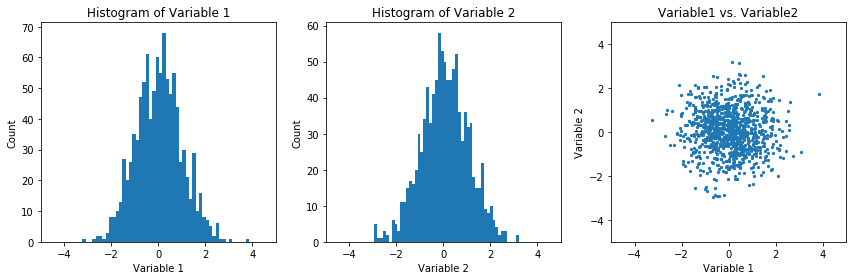

In [3]:
"""
First, we will generate a pair of random variables and plot their 
distributions, as well as their relationship with each other
"""
np.random.seed(SEED)

# make two large, random variables
random_data1 = np.random.normal(0, 1, 1000)
random_data2 = np.random.normal(0, 1, 1000)

# set axis limits
axis_lims = (-5, 5)

# plot histogram of first random variable
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(random_data1, 50)
plt.xlim(axis_lims)
plt.xlabel('Variable 1')
plt.ylabel('Count')
plt.title('Histogram of Variable 1')

# plot histogram of second random variable
plt.subplot(1,3,2)
plt.hist(random_data2, 50)
plt.xlim(axis_lims)
plt.xlabel('Variable 2')
plt.ylabel('Count')
plt.title('Histogram of Variable 2')

# plot scatter plot of the first variable against the second
plt.subplot(1,3,3)

# COMPLETE THIS LINE OF CODE TO PLOT THE SCATTER PLOT-----
plt.scatter(random_data1, random_data2, 5)
#---------------------------------------------------------

plt.xlim(axis_lims)
plt.ylim(axis_lims)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Variable1 vs. Variable2')
plt.tight_layout()

# compute Pearson's linear correlation coefficient
rho, pval = stats.pearsonr(random_data1, random_data2)
print('Pearson correlation: rho = ',rho, ', p-value = ', pval)

### Question:
___
(1) Based on visual examination of the scatterplot (third figure), do the two variables look correlated? 

[Random variable 1 and 2 do not seem to be correlated from the scatterplot. They both have a normal distribution as seen in plots 1 and 2. The scatter plot of the two variables do not show a positive or negative correlation and as such it seems that the two data sets are unrelated.]
___
(2) Based on the correlation coefficient and p-value printed above, are the two variables significantly correlated (assume a significance threshold of p=0.05)? 

[The pearson correlation coefficient is -.04 which means that the two variables have very little correlation. Pearson coefficients can range from -1 to 1, where the larger the absolute value of the coefficient, the more related the two variables are. Since the absolute value of -.04 is very close to zero, the variables seem to be unrelated. Furthermore, a p value <= .05 is considered statistically significant. The two variables have a p value of .2 which is above the statistical significance threshold also confirming that the two variables are unrelated. ]

In [5]:
"""
Now, we will do what we did above, but 1000 times, and record the correlation
coefficient and p-value for every "experiment".
"""
np.random.seed(SEED+10)

# define the number of experiments and pre-allocate arrays
n_exp = 1000
rhos = np.zeros(n_exp)
pvals = np.zeros(n_exp)

# loop through
for exp in range(n_exp):
    # simulate the two random variables
    random_data1 = np.random.normal(0, 1, 1000)
    random_data2 = np.random.normal(0, 1, 1000)

    # record their correlation, index the array with the advancing counter variable from the for-loop
    rhos[exp], pvals[exp] = stats.pearsonr(random_data1, random_data2)
    #---------------------------------------------------------
    
# count the number of experiments that was significant at p<0.05
p_thresh = 0.05
n_sig_exps = np.sum(pvals<p_thresh)
# ---------------------------------------------




print(n_sig_exps, 'out of', n_exp, 'experiments was significant at p<0.05.') 
# ---------------------------------------------

(53, 'out of', 1000, 'experiments was significant at p<0.05.')


### Question 2
(1) Complete the code above to print how many experiments had correlations that was significant. Fill in your code where it says YOUR_CODE_HERE (3 lines).
___
(2) How many random experiments resulted in statistically significant correlations? (Just read the printout.) 

[53 out of 1000 experiments was significant at p<0.05.]
___
(3) Is this number (roughly) what we expect out of 1000 experiments? In other words, how do we interpret the fact that some number of experiments had significantly correlated variables even though they were randomly generated? Hint: frame this answer in the context of the p-value threshold we chose. 

[Some experiments had significant results because we chose a p value of .05. We had 53 of 1000 experiments show a p value less than our chosen threshold of.05 which is .053 of the experiments showed statistical significance. Since the data was randomly generated, the p value can range anywhere from 0 to 1 and since 1000 experiments were conducted, about .05 of those would have a p value less than .05 due to statistical chance.]

# Part 2: Generating Related Variables
For the second part, we will now generate random but linearly related variables and add some noise to it, and plot what that looks like.

('Correlation between height and weight is:', 0.88792997894669912)


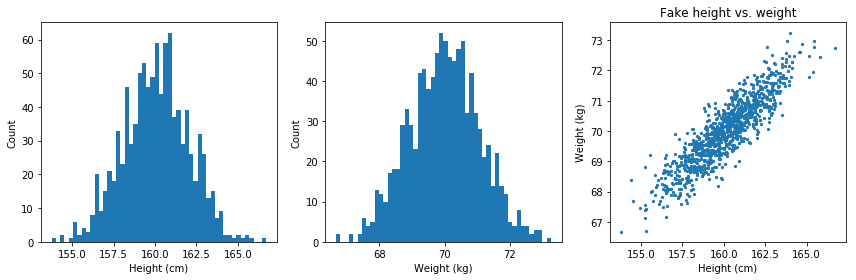

In [6]:
np.random.seed(SEED-10)

noise_level = 0.5

# now let's make a fake random variable that looks kind of like what height (in cm) might look like
height = np.random.normal(160, 2, 1000)

# now let's make another random variable that looks like weight
# this will a function of height plus a little noise to make them highly correlated
weight = (height - 20) / 2
weight = weight + np.random.normal(0, noise_level, 1000)

# plot them
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(height, 50)
plt.xlabel('Height (cm)')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(weight, 50)
plt.xlabel('Weight (kg)')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.scatter(height, weight, 5)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Fake height vs. weight')
plt.tight_layout()

# compute the correlation
rho, pval = stats.pearsonr(height, weight)
print('Correlation between height and weight is:', rho)

### Question 3:
(1) The histograms should look very similar to what you see from Part 1, Question 1, which look like normally (Gaussian) distributed random variables. However, this time the two variables are much more correlated (rightmost plot) than before. Why is that/how did this come about, and what does that imply about how the distributions of variables affect the relationship between two variables?

[While the variables themselves are normally distributed just as the previous set of data from part 1, the two variables in this case have a correlation. The normal distribution only shows the relative positioning of the points with respect to other data points from the same set. From the normal distribution one can get a visual for where most of the data points are but each distribution tells you only about that one variable, so no relationship can be seen. However, where plotted against one another as done in the scatter plot, one can see that there exists a relationship between the two variables. In this case, as height increases, there is an increase in weight, and vice versa. In the dataset from part 1, while normally distributed, there was no relationship between the variables. So an increase in one variable did not predict a change in the other. This goes to show, that two variables can have similiar distributions, but whether or not they are correlated, can only be seen by plotting the variables against one another.  ]
___

(2) Which parameter/variable in the code above, and to what value, would you change to get a correlation coefficient of 1 between height and weight? Feel free to play with the code but remember to change that value back to the original before submitting your assignment.

[In the code above, the weight is defined by a linear relationship to height. However, noise is then added to the data which causes the linearity to shift away from 1. By removing the noise added to the data, one can obtain a correlation constant of 1 because then the data points fall on a perfect line. ]

# Part 3: Investigating Real Data

For the final part, we will look at some real data: IMDB movie ratings from 1950 to 2016. The code to scrape and store the data can be found here: https://github.com/jasongfleischer/imdbscrape. The database contains several variables for every movie, we will look specifically at the numerical variables, like rating, runtime, votes, etc.

In [8]:
# import the necessary libraries to handle the data, specifically, pandas and json
import pandas as pd
import json
with open('movie_data.json', 'r') as fp:
    movieList = json.load(fp) # creates a list of dictionaries, each dict holding one movie
movieData = pd.DataFrame(movieList) # turn the list into a panda-style DataFrame
movieData # show some example rows of movie data

,actors,directors,genres,metascore,mpaa,name,outline,rating,runtime,usbox,votes,year
0,"[Fredric March, Dana Andrews, Myrna Loy, Teres...",[William Wyler],"[Drama, Romance, War]",NaN,Passed,The Best Years of Our Lives,\nThree World War II veterans return home to s...,8.1,172.0,23650000,42639,1946
1,"[Jennifer Jones, Joseph Cotten, Gregory Peck, ...","[King Vidor, Otto Brower, William Dieterle, Si...","[Drama, Romance, Western]",NaN,Unrated,Duel in the Sun,\nBeautiful half-breed Pearl Chavez becomes th...,6.9,129.0,20400000,6548,1946
2,"[Robert Walker, Van Heflin, Lucille Bremer, Ju...","[Richard Whorf, Vincente Minnelli, George Sidney]","[Biography, Musical]",NaN,Unrated,Till the Clouds Roll By,"\nBiography of songwriter, Broadway pioneer, J...",6.5,132.0,6724000,1634,1946
3,"[Gregory Peck, Jane Wyman, Claude Jarman Jr., ...",[Clarence Brown],"[Drama, Family]",NaN,Approved,The Yearling,\nA boy persuades his parents to allow him to ...,7.3,128.0,5200000,4452,1946
4,"[Viviane Romance, Michel Simon, Max Dalban, Ém...",[Julien Duvivier],[Drama],NaN,None,Panic,"\nIn the suburbs of Paris, an old maid has jus...",7.9,91.0,33507,589,1946
5,"[Jean Marais, Josette Day, Mila Parély, Nane G...","[Jean Cocteau, René Clément]","[Drama, Fantasy, Romance]",92.0,Not Rated,Beauty and the Beast,\nA beautiful young woman takes her father's p...,8.0,93.0,20324,19873,1946
6,"[James Stewart, Donna Reed, Lionel Barrymore, ...",[Frank Capra],"[Drama, Family, Fantasy]",NaN,PG,It's a Wonderful Life,\nAn angel is sent from Heaven to help a despe...,8.6,130.0,295973,295973,1946
7,"[Orson Welles, Edward G. Robinson, Loretta You...",[Orson Welles],"[Crime, Drama, Film-Noir]",NaN,Approved,The Stranger,\nAn investigator from the War Crimes Commissi...,7.4,95.0,14317,14317,1946
8,"[Humphrey Bogart, Lauren Bacall, John Ridgely,...",[Howard Hawks],"[Crime, Film-Noir, Mystery]",NaN,Approved,The Big Sleep,\nPrivate detective Philip Marlowe is hired by...,8.0,114.0,66368,66368,1946
9,"[Cary Grant, Ingrid Bergman, Claude Rains, Lou...",[Alfred Hitchcock],"[Drama, Film-Noir, Romance]",NaN,Approved,Notorious,\nA woman is asked to spy on a group of Nazi f...,8.0,101.0,76553,76553,1946


Now, we want to investigate the correlation between the various variables. In the previous sections, we computed the correlation coefficient between a pair of variables. Here, we have many pairwise relationships. Instead of calling stats.pearsonr many times, we can do all of that in one go with a correlation matrix, pd.corr().

In [9]:
print('Correlation Matrix for Movie Data')
movieData.corr()

Correlation Matrix for Movie Data


,metascore,rating,runtime,usbox,votes,year
metascore,1.000000,0.766178,0.274893,0.145333,0.348253,-0.322213
rating,0.766178,1.000000,0.332746,0.084824,0.305675,-0.185475
runtime,0.274893,0.332746,1.000000,0.188279,0.263521,0.138712
usbox,0.145333,0.084824,0.188279,1.000000,0.683753,0.556163
votes,0.348253,0.305675,0.263521,0.683753,1.000000,0.427077
year,-0.322213,-0.185475,0.138712,0.556163,0.427077,1.000000


### QUESTION 4:
(1) What does the element in row 'rating' and column 'metascore' mean? Why is the diagonal of the table all 1.000? 

[The value in row 'rating' and column 'metascore' is the correlation coefficient found between those two variables. The diagonal values are all 1 because a variable will have a correlation coefficient of 1 with itself since the two are directly related-- they are the same.]
___
(2) Notice that the table is symmetric around the diagonal. Meaning, the value at row 2 column 3 is the same as row 3 column 2. Explain why this is the case.

[The table is symmetric around the diagonal because the correlation coefficient between two variables gets repeated symmetrically around the diagonal. For example, in row 'votes' and column 'metascore', and column 'votes' and row 'metascore' the value is both .348 as the correlation coefficient between the two variables is .3498. The correlation coefficient between two variables stays the same. ]
___
(3) Find the largest (most positive) off-diagonal (not 1.0) correlation coefficient. What are the two variables, and briefly explain why they might be strongly correlated?

[Metascore and rating are the most positively correlated with a correlation coefficient of .766. Metascore is a weighted rating from critics and viewerds of the movie while the rating is just the rating provided by viewers of the movie. As they both are ratings from viewers and the only difference is the metascore includes critic ratings, it would explain why the two variables have a high positive correlation.]

('Line of best fit: y = ', 2667.1969256549864, '* x +', -5223152.8542343145)
('Predicted votes for 2020 is:', 164584.94)


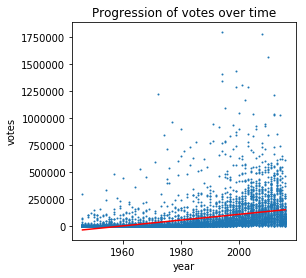

In [10]:
"""
Lastly, we will plot two of the variables and perform linear regression on the dataset. 
"""
X = movieData['year']
Y = movieData['votes']

# perform linear regression
mask = ~np.isnan(X) & ~np.isnan(Y) # mask to take care of NaN values
lin_fit = stats.linregress(X[mask], Y[mask])
R2 = lin_fit.rvalue**2
print('Line of best fit: y = ', lin_fit[0],'* x +', lin_fit[1])

# scatter plot
plt.figure(figsize=(4,4)) 
plt.scatter(X, Y, 1) # plot scatterplot of year vs. votes
plt.xlabel('year')
plt.ylabel('votes')
plt.title('Progression of votes over time')

# plotting linear regression line
xs=[np.min(X), np.max(X)]
ys= [ lin_fit[0] * xs[0] + lin_fit[1], lin_fit[0] * xs[1] + lin_fit[1] ]
plt.plot(xs,ys,'r')

#calculate votes for 2020
vote_2020=2667.19692565 * 2020 + -5223152.85423
print('Predicted votes for 2020 is:', round(vote_2020,2))

### Question 5: 
(1) Using the linear model, what's your prediction for a movie rating in the year 2000, up to 2 decimal places? (Hint: use the equation for the line of best fit)

[Predicted votes for 2020 is: 164584.94]
___
(2) Was Pearson linear correlation coefficient an appropriate measure for this pair of variables? Why or why not? Justify your answer.

[While the pearson coefficient may provide a good estimate of future voting numbers, there may be better models for the data. Due to the exponential increase in the amount of users who have acces to the internet, view movie ratings online, and vote themselves, the data may be better represented with a logistic growth over time. However, a linear relationship will provide a good estimate, as the data is still positively correlated.]
___
(3) Why do you think we observe this positive trend between the number of votes for a movie and the year it was made in?

[The positive trend between movie year and votes can be seen due to the increase in voters online. This can be explained by the increase in access to internet and increase in users online. The total number of users online can be considered a sample space. There are more people now who are online and vote on movies than there were in 1980, thus the number of votes increase over time as the total online population grows.]
___